# Predicting sale price of Ames, IA homes
## Machine Learning and Regression 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [69]:
housing_raw = pd.read_csv('AmesHousing.csv')

## Initial Exploration 

In [70]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 82 entries, Order to SalePrice
dtypes: float64(11), int64(28), object(43)
memory usage: 1.8+ MB


In [71]:
housing_raw.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [72]:
housing_raw.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Missing Values

In [73]:
housing_raw.isnull().sum(axis=0)

Order              0
PID                0
MSSubClass         0
MSZoning           0
LotFrontage      490
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 82, dtype: int64

In [74]:
nan_cols = [i for i in housing_raw.columns if housing_raw[i].isnull().any()]
print(nan_cols)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [75]:
nan_cols_remove = [i for i in housing_raw.columns if housing_raw[i].isnull().sum() > 0.70*len(housing_raw)]
print(nan_cols_remove)


['Alley', 'PoolQC', 'Fence', 'MiscFeature']


## Potential Categorical Variables

In [76]:
housing_raw_list = list(housing_raw.select_dtypes(include='object'))
len(housing_raw_list)

43

In [77]:
housing_raw_objects = housing_raw.select_dtypes(include='object')
print(housing_raw_objects)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
1          RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
3          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
2925       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
2926       RL   Pave   NaN      IR1         Low    AllPub    Inside       Mod   
2927       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2928       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Mod   
2929       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition

## Top Factors That Affect Home Value

The top factors that influence the value of a home include location, size, housing market factors, age and condition of the ho
me, renovations, curb appeal, future development, and the economy.

Fields related to these factors should be visualized as these are the most interesting variables and include:  

LotArea, Neighborhood, Condition1, OverallCond, YearBuilt, YearRemodAdd, ExterCond, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, TotRmsAbvGrd

In [78]:
# create working copy of data

housing = housing_raw.copy(deep=True)

## Feature Engineering

### Remodel

If the house was remodeled, then YearRemodAdd is populated. A new column that takes boolean values will be created to indicate if the house has ever been remodeled. 

In [79]:
housing['Remodel'] = [True if x is not None else False for x in housing['YearRemodAdd']]


### Total Square Footage 

There are various square footage fields in the data and many of these can be consolidated. For instance, GrLivArea (the above (grade) living area square feet) is simply the sum of 1stFlrSF and 2ndFlrSF. 

In [80]:
housing[['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']].head(50)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea
0,1080.0,1656,0,1656
1,882.0,896,0,896
2,1329.0,1329,0,1329
3,2110.0,2110,0,2110
4,928.0,928,701,1629
5,926.0,926,678,1604
6,1338.0,1338,0,1338
7,1280.0,1280,0,1280
8,1595.0,1616,0,1616
9,994.0,1028,776,1804


In [81]:
# find instances of Nulls in the TotalBsmtSF

no_base = housing[housing['TotalBsmtSF'].isna()]
no_base[['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']]

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea
1341,NaN,896,0,896


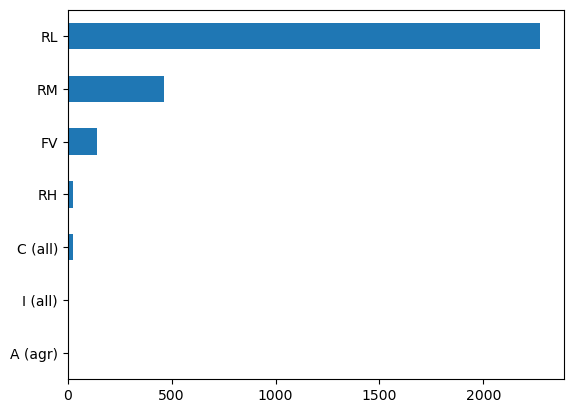

In [82]:
housing_raw_objects['MSZoning'].value_counts().plot(kind='barh').invert_yaxis()